### Exploring New York Airbnb

#### Coursea IBM Capstone Project

##### Introduction
In this project, we will find out what are the reasons that will lead to people choosing a particular apartment on Airbnb. Our targeted audience will be anyone who are looking to rent within the Airbnb community. Since there are tons of Airbnb listing aorund the globe, we will focus on New York, USA as a start. We will also use datasets that excludes Airbnb listings that have 0 reviews so that we are able to clearly define what makes a person choose a particular apartment on Airbnb.

#### Data
Based on our problems, we will include the following factors from our dataset
* Price
* Number of reviews
* Room type

We will also be using foursquare API to locate nearby ameneties for different Airbnb and determine whether it have an impact on a person's decision.

#### Manipulate data from kaggle to fit our project

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
df= pd.read_csv('https://storage.googleapis.com/kaggle-data-sets/268833/611395/compressed/AB_NYC_2019.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1590213392&Signature=SSLmaHeRkluLz%2FttALGxQTj4wjk2WjqINbeMBiY43ok%2FDdwuh3DqddeE76WBgo53MiNzpXyYPWiLgorF6yqoiZvCe2if8%2BhD13kCa7Y5zKej%2B0Gqt%2FkU7RFUFsj2kP313C86Tj%2Fm%2Fo2iTl%2F1UlwrvKg%2F0IX9jiYxjWz5ZG4F0osJ0pH%2Bj6MgLxhGoujVHxGcKk0DMsFGRo2kCQH4tQgwap8Zk6nAcpLjS3vEBXAuQjhNd8MCGaMg6Lb8HnWsKuBpjeVIDNk2G9aQbvGrVLP%2F%2BOZBYUzbtswzCh7xDuhzAavFhiSX83kca4ZUZpsl9TCv6DjvTh1ZXRXhILmXGyMtOw%3D%3D&response-content-disposition=attachment%3B+filename%3DAB_NYC_2019.csv.zip')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
changeddf = df.drop(['id','name','minimum_nights','last_review','reviews_per_month','calculated_host_listings_count','availability_365'], axis=1)

In [16]:
changeddf.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,9
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,45
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,0
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,270
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,9


We will be selecting the top 100 Airbnb via number of reviews as our focal point

In [16]:
sorteddf= changeddf.sort_values(['number_of_reviews'], ascending=False)
finaldf= sorteddf.head(100)
finaldf

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews
11759,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,629
2031,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,607
2030,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,597
2015,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,594
13495,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,576
10623,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,543
1879,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,540
20403,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,510
4870,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,488
471,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,480


## Now we will plot a scatter plot to determine where the majority of reviews belong to in their apartment types.

In [11]:
import matplotlib.pyplot as plt

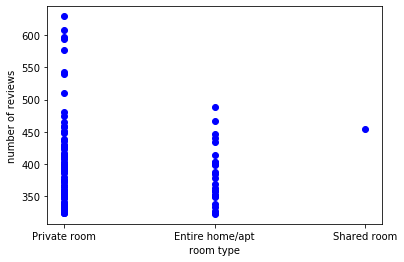

In [17]:
plt.scatter(finaldf.room_type, finaldf.number_of_reviews,  color='blue')
plt.xlabel("room type")
plt.ylabel("number of reviews")
plt.show()

As we can see, private rooms have garnered more reviews compared to an entire room/apartment and shared room

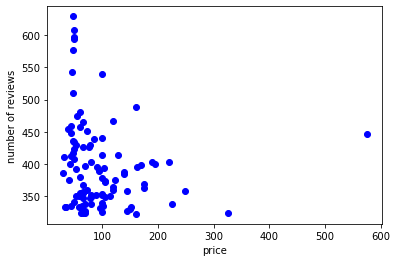

In [18]:
plt.scatter(finaldf.price, finaldf.number_of_reviews,  color='blue')
plt.xlabel("price")
plt.ylabel("number of reviews")
plt.show()

From the chart above, most reviews came from Airbnb with a much cheaper price compared to other accomodation choices

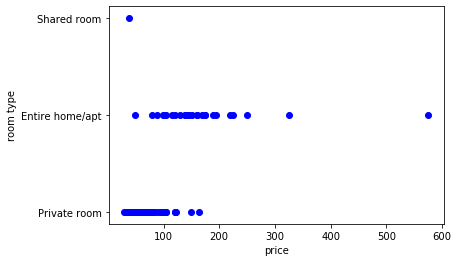

In [23]:
plt.scatter(finaldf.price, finaldf.room_type,  color='blue')
plt.xlabel("price")
plt.ylabel("room type")
plt.show()

As we can see from the scatterplot above, private rooms are generally much cheaper compared to other room types.

Thank you